# ANSI_X3.4-1968 error
## Use this code block when you get ANSI_X3.4-1968 error

In [ ]:
import locale
print(locale.getpreferredencoding())

UTF-8


In [24]:
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding
print(locale.getpreferredencoding())

UTF-8


## Creating a folder to store images from DALLE-2

In [ ]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
!mkdir "Autodistill with Synthetic Data from DALLE-2 using LLaMa 2"

# Training model using Autodistill

## Installing packages

In [ ]:
!pip install -q supervision autodistill autodistill-grounded-sam autodistill_yolov8
!pip install --upgrade pillow==6.2.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 34.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.4/82.4 kB 11.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.0/527.0 kB 44.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.6/215.6 kB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 66.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.3/250.3 kB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 77.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 32.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 83.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 128.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.8/37.8 MB 31.9 MB/s eta 0:00:

In [ ]:
import PIL
print(PIL.PILLOW_VERSION) # checking pillow version


6.2.2


## Setting Ontology

In [ ]:
import cv2

from autodistill_grounded_sam import GroundedSAM
from autodistill.detection import CaptionOntology
from autodistill_yolov8 import YOLOv8
# Ontology is used  to label a Dataset that is used to train a Target Model which outputs a Distilled Model fine-tuned to perform a specific Task
# defining an ontology to map class names to GroundingDINO prompt
base_model = GroundedSAM(ontology=CaptionOntology({
  "traffic light": "traffic_light"
}))
# format of the ontology is {caption: class}
# where caption is the prompt sent to the base model, and class is the label that will be saved for that caption in the generated annotations


trying to load grounding dino directly
downloading dino model weights


/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


final text_encoder_type: bert-base-uncased


## Testing it

/usr/local/lib/python3.10/dist-packages/transformers/modeling_utils.py:881: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:31: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")


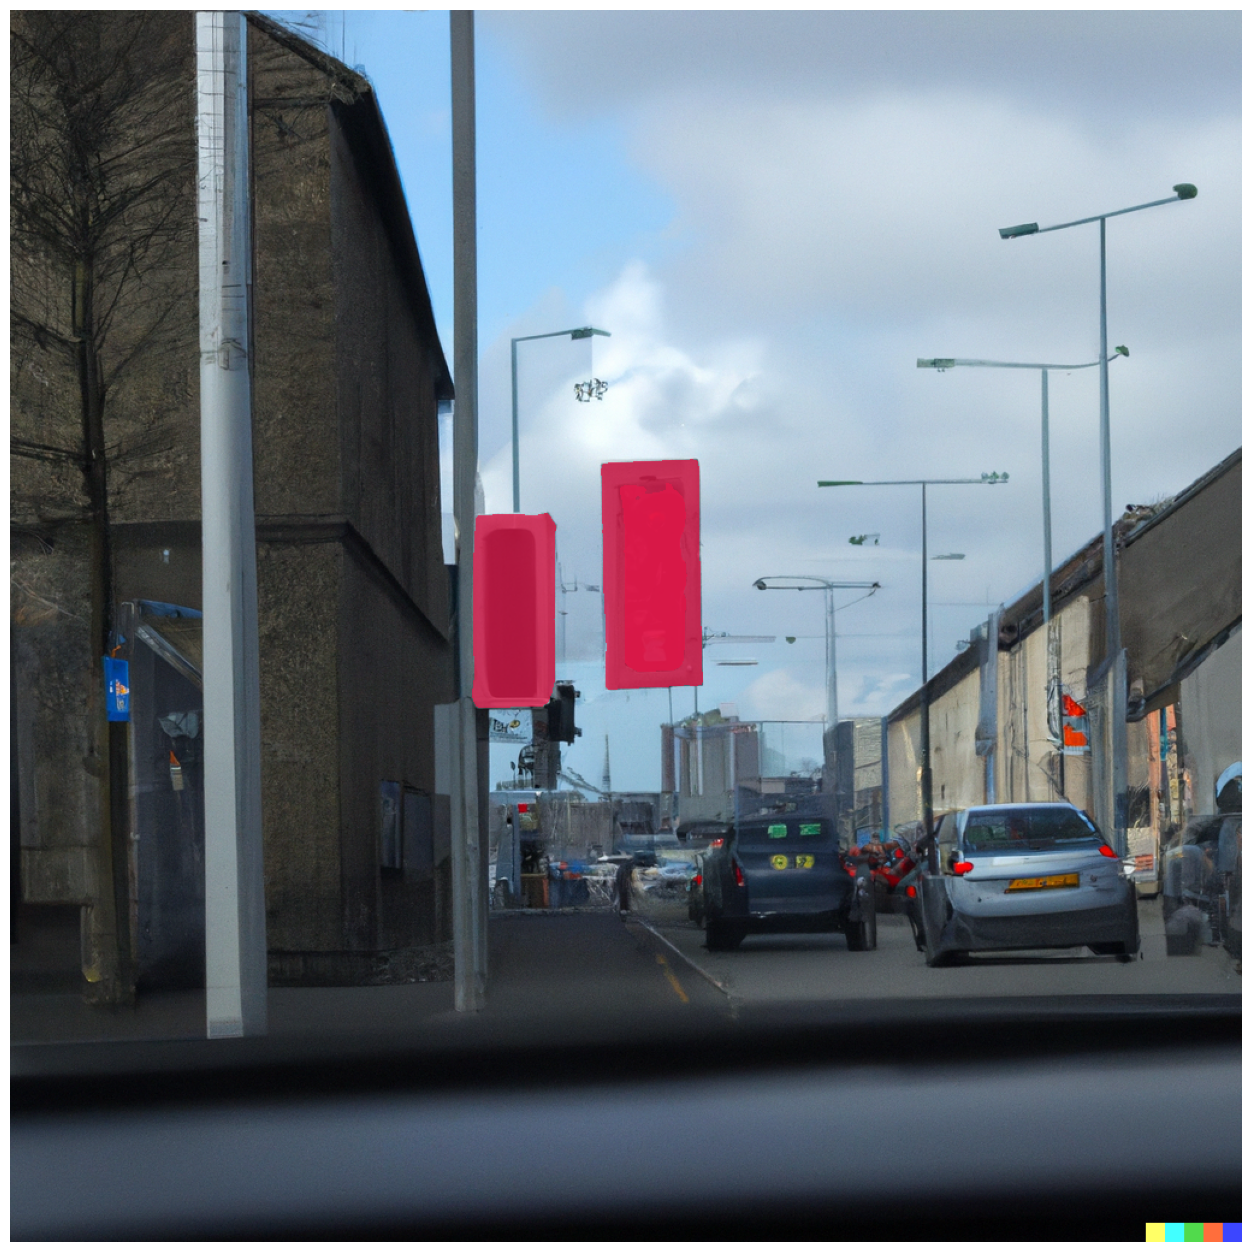

In [ ]:
import os
import supervision as sv

test_image_path = os.path.join("Autodistill with Synthetic Data from DALLE-2 using LLaMa 2",os.listdir("Autodistill with Synthetic Data from DALLE-2 using LLaMa 2")[0])
test_image = cv2.imread(test_image_path)

detections = base_model.predict(test_image_path)

mask_annotator = sv.MaskAnnotator()

annotated_frame = mask_annotator.annotate(
    scene=test_image.copy(), detections=detections, opacity = 0.75
)

sv.plot_image(annotated_frame, (16, 16))

## Annotating the dataset

In [ ]:
input_dir = "Autodistill with Synthetic Data from DALLE-2 using LLaMa 2"
output_dir = "dataset"

import glob
print(glob.glob(input_dir+"/*"))

dataset = base_model.label(
  input_folder = input_dir,
  extension = "",
  output_folder = output_dir,
)

['Autodistill with Synthetic Data from DALLE-2 using LLaMa 2/traffic_light (1).png', 'Autodistill with Synthetic Data from DALLE-2 using LLaMa 2/traffic_light (2).png', 'Autodistill with Synthetic Data from DALLE-2 using LLaMa 2/traffic_light (3).png', 'Autodistill with Synthetic Data from DALLE-2 using LLaMa 2/traffic_light (4).png', 'Autodistill with Synthetic Data from DALLE-2 using LLaMa 2/traffic_light (5).png', 'Autodistill with Synthetic Data from DALLE-2 using LLaMa 2/traffic_light (6).png', 'Autodistill with Synthetic Data from DALLE-2 using LLaMa 2/traffic_light (7) (1).png', 'Autodistill with Synthetic Data from DALLE-2 using LLaMa 2/traffic_light (7).png', 'Autodistill with Synthetic Data from DALLE-2 using LLaMa 2/traffic_light (8).png', 'Autodistill with Synthetic Data from DALLE-2 using LLaMa 2/traffic_light (9).png', 'Autodistill with Synthetic Data from DALLE-2 using LLaMa 2/traffic_light (10).png', 'Autodistill with Synthetic Data from DALLE-2 using LLaMa 2/traffic_li

Labeling Autodistill with Synthetic Data from DALLE-2 using LLaMa 2/traffic_light (1).png:   0%|          | 0/36 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/modeling_utils.py:881: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:31: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")
Labeling Autodistill with Synthetic Data from DALLE-2 using LLaMa 2/traffic_light (35).png: 100%|██████████| 36/36 [02:11<00:00,  3.66s/it]


Labeled dataset created - ready for distillation.


## Training the model using YOLOv8

In [ ]:
model = YOLOv8("yolov8l.pt")
model.train("dataset/data.yaml", epochs=100)

100%|██████████| 83.7M/83.7M [00:05<00:00, 17.3MB/s]
New https://pypi.org/project/ultralytics/8.0.148 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.81 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=dataset/data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_thickness=3, visualize=False, augment=Fa

## Performance Metrics

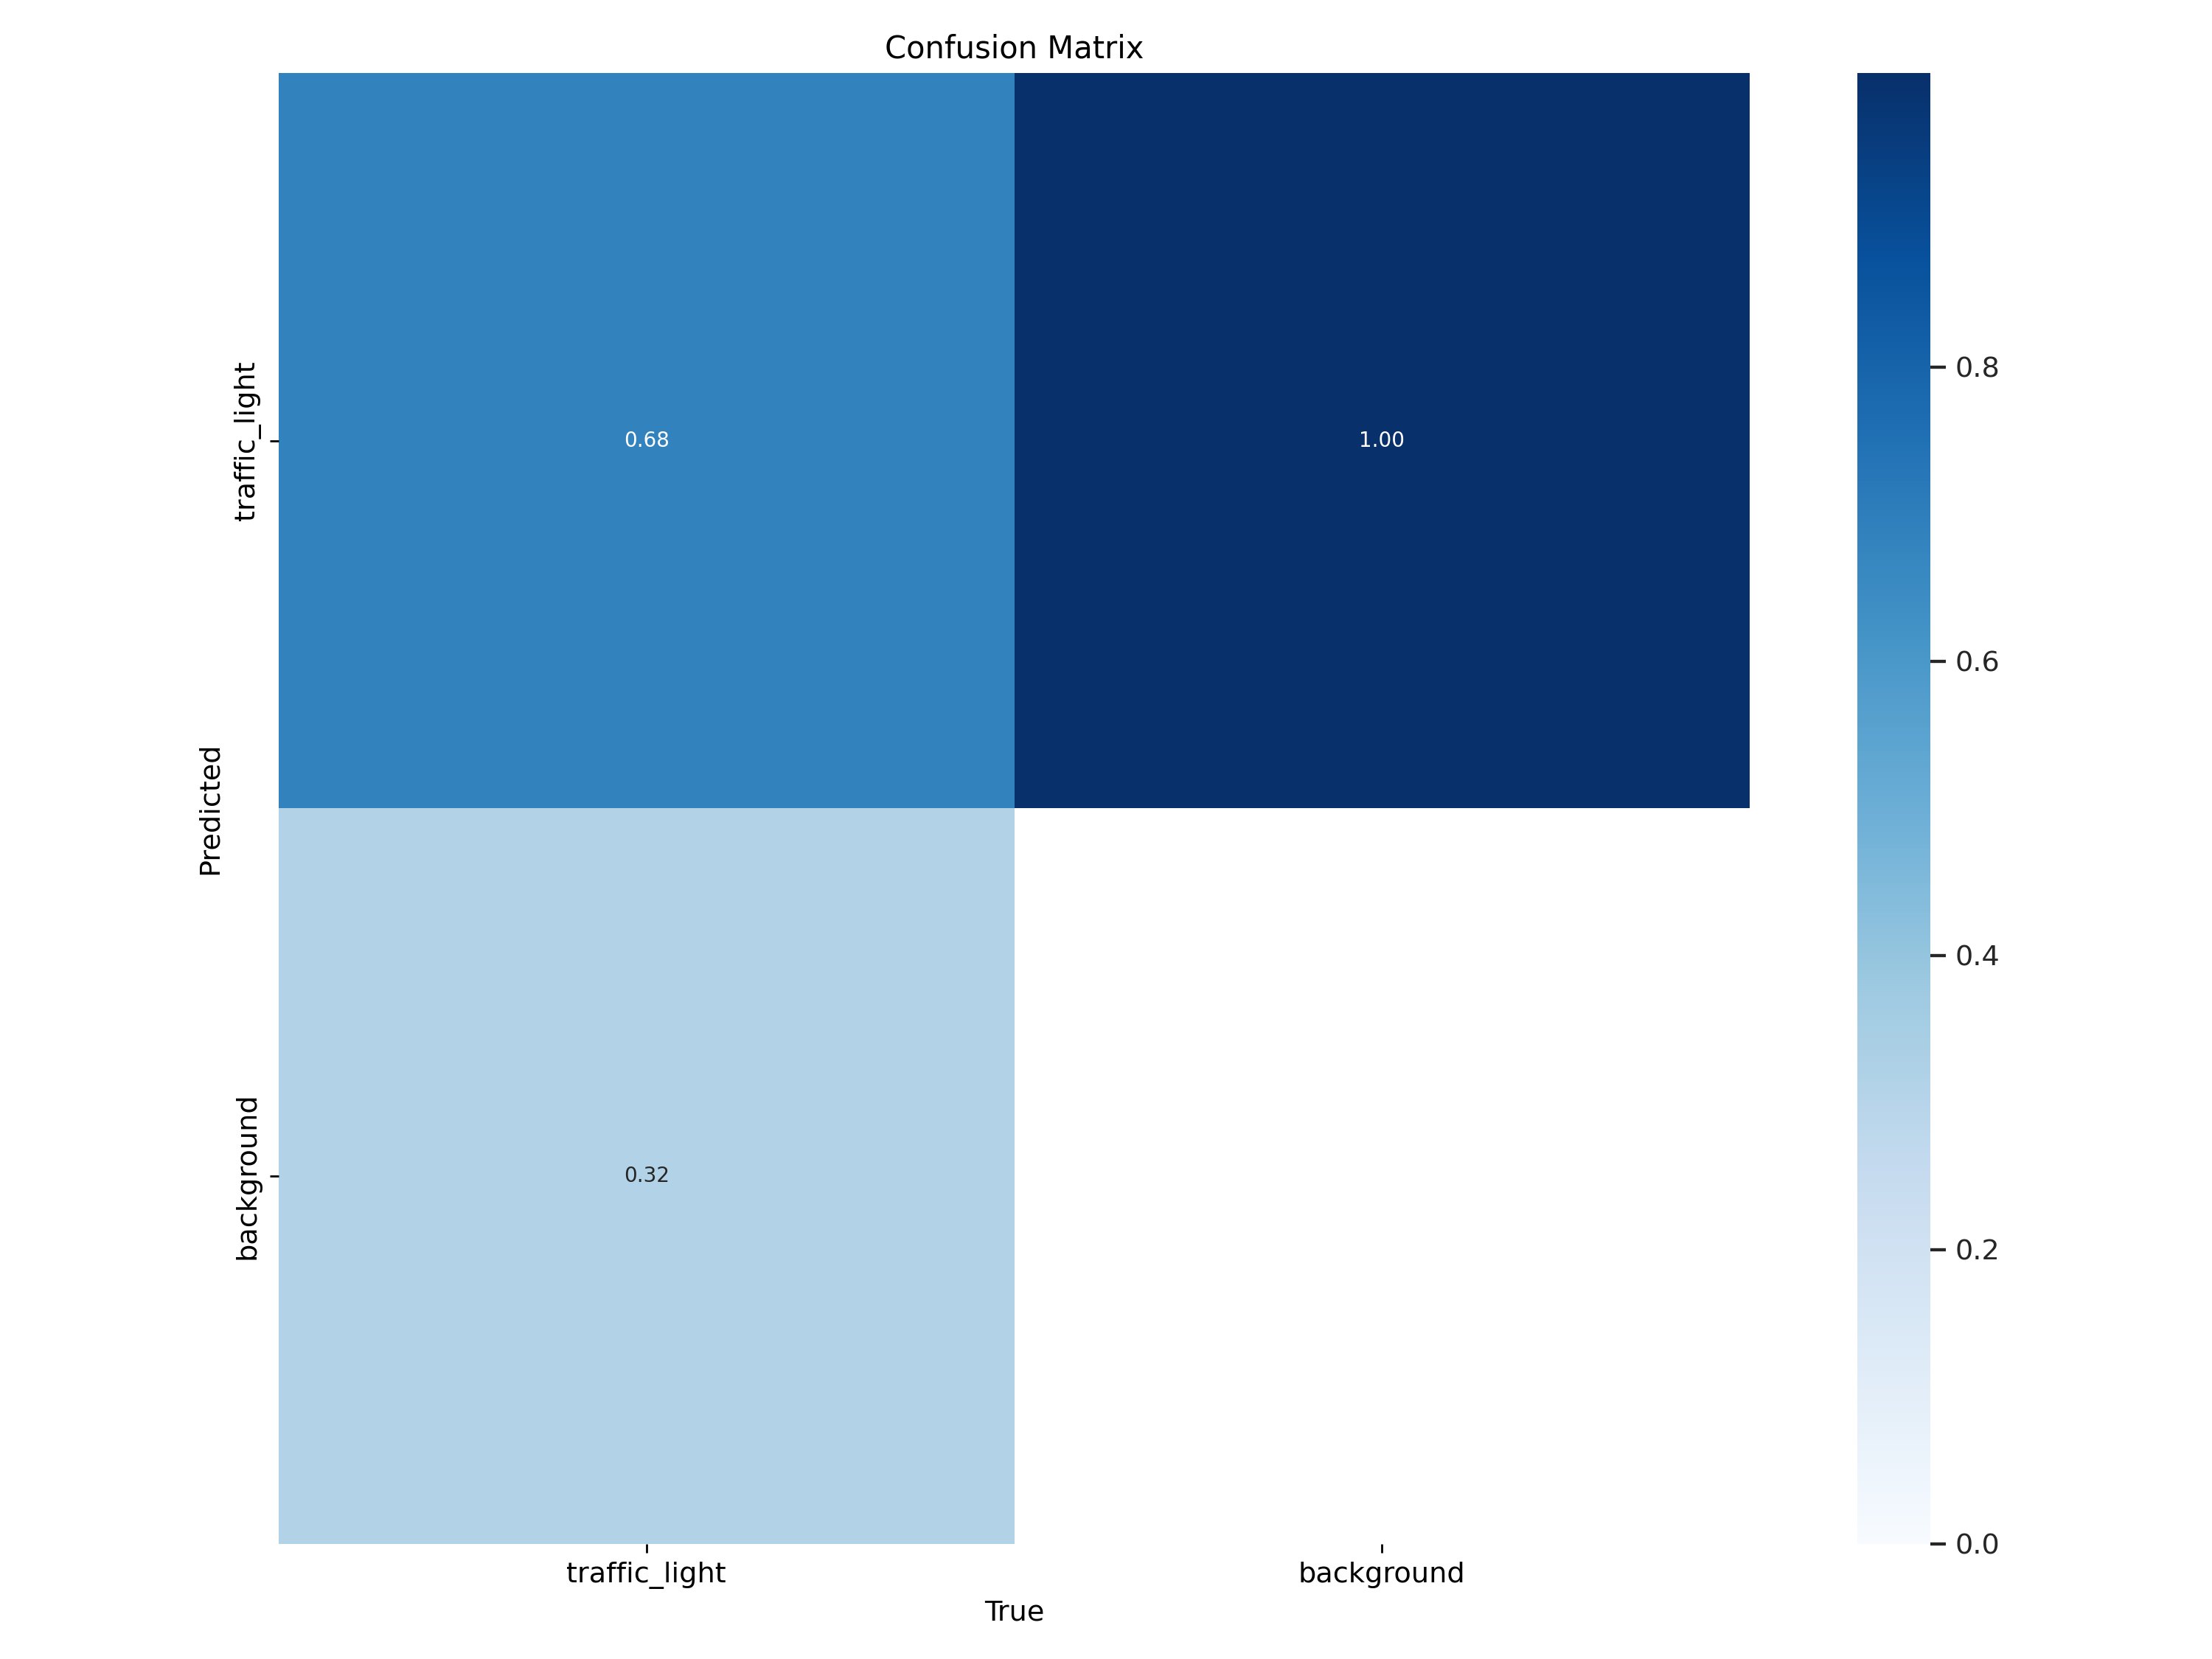

In [21]:
from PIL import Image
# Confusion Matrix
Image.open('runs/detect/train2/confusion_matrix.png')

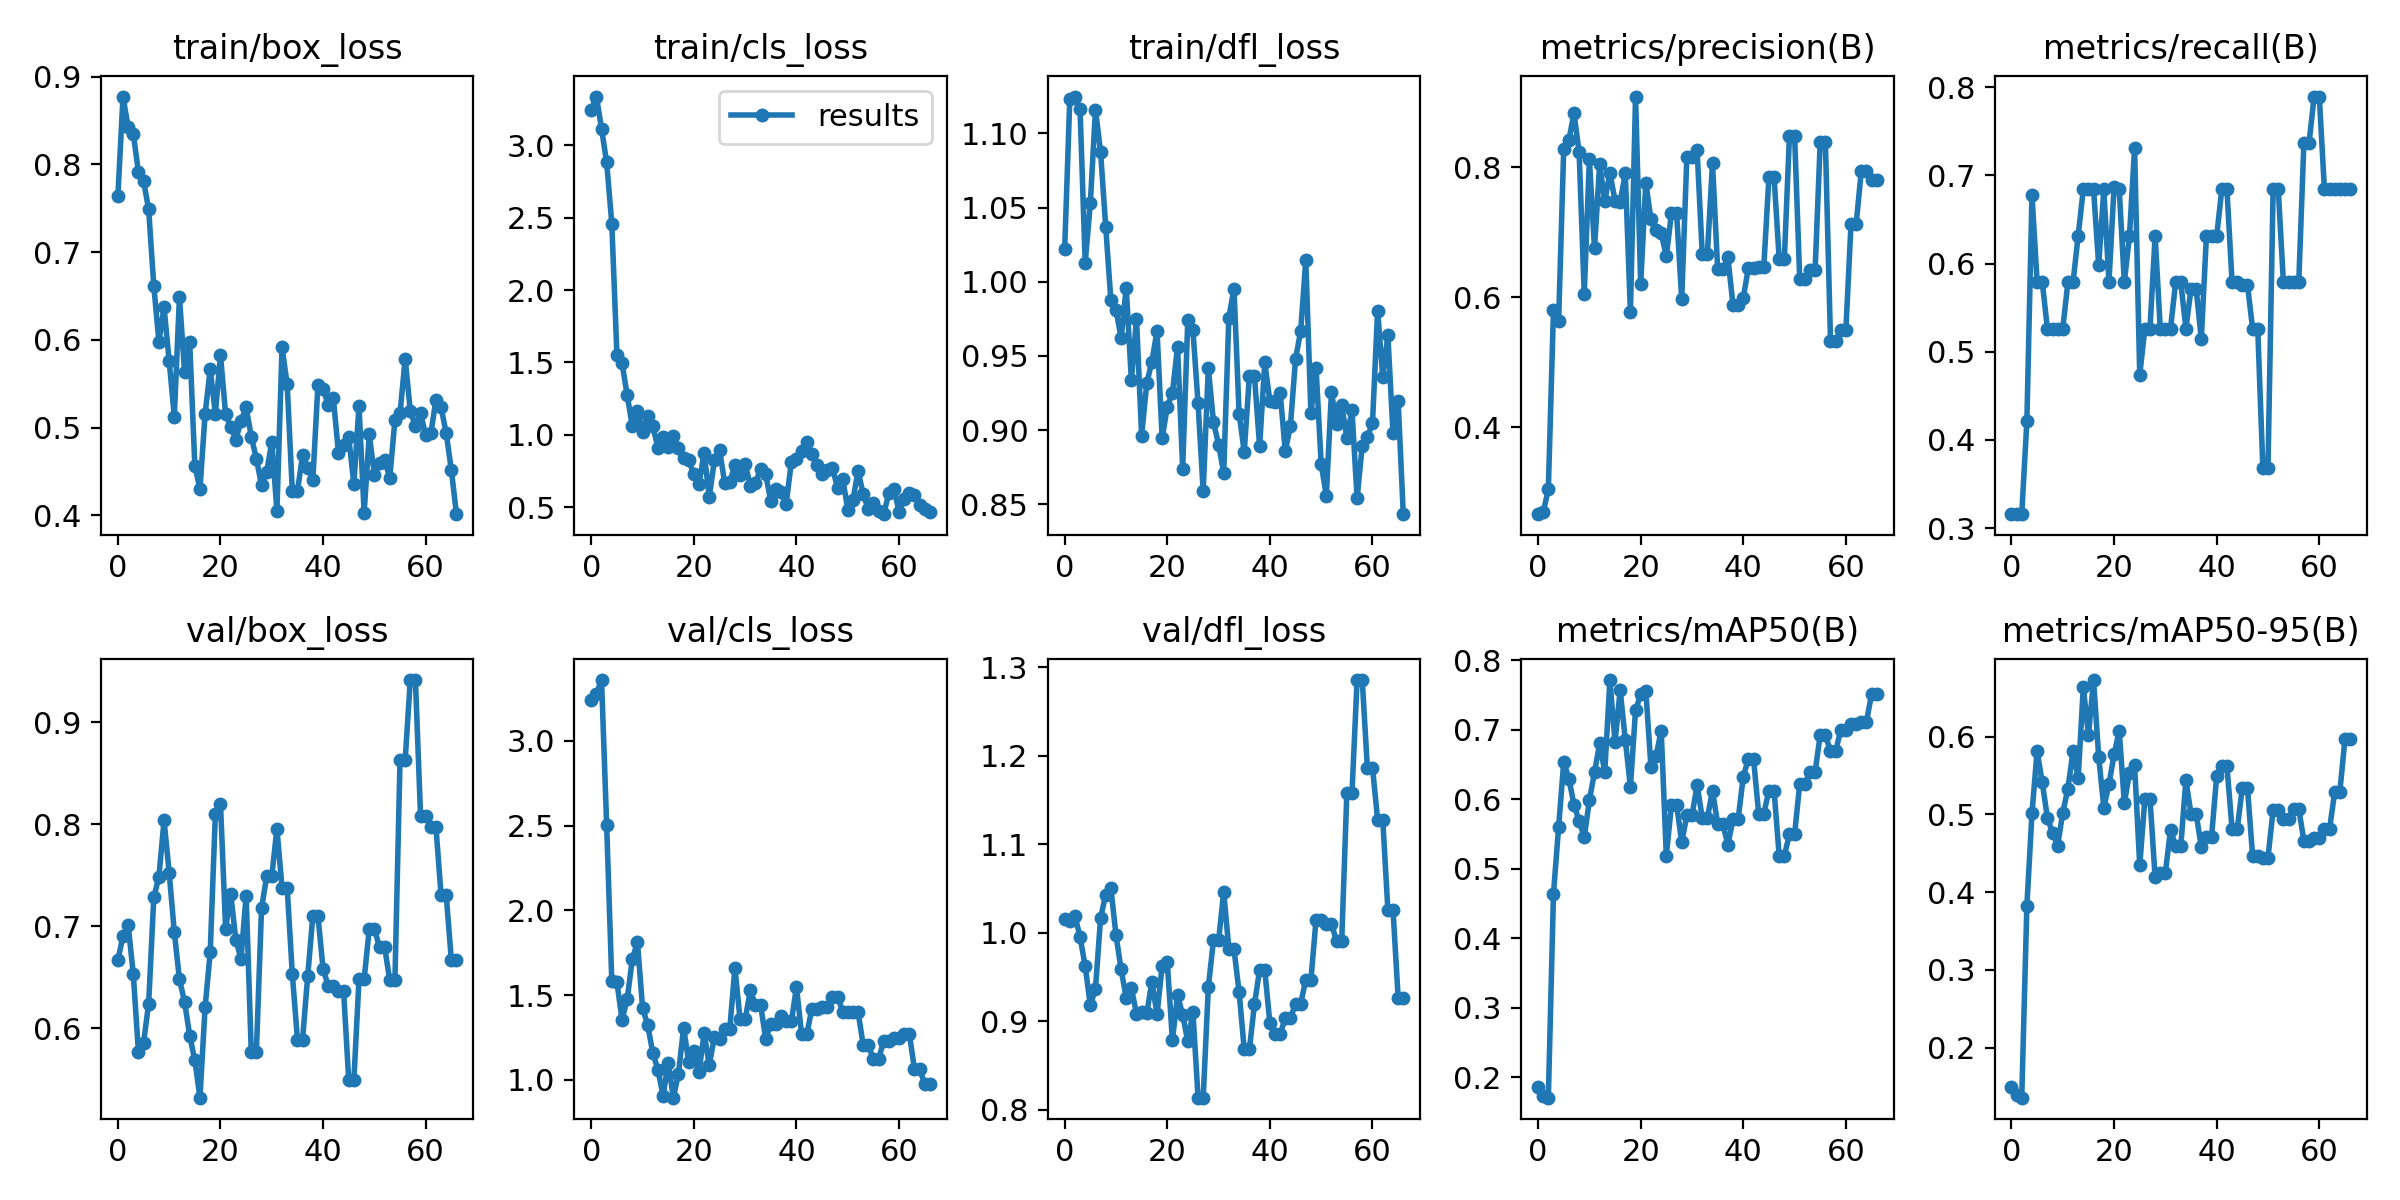

In [22]:
# Results metrics
Image.open('runs/detect/train2/results.png')

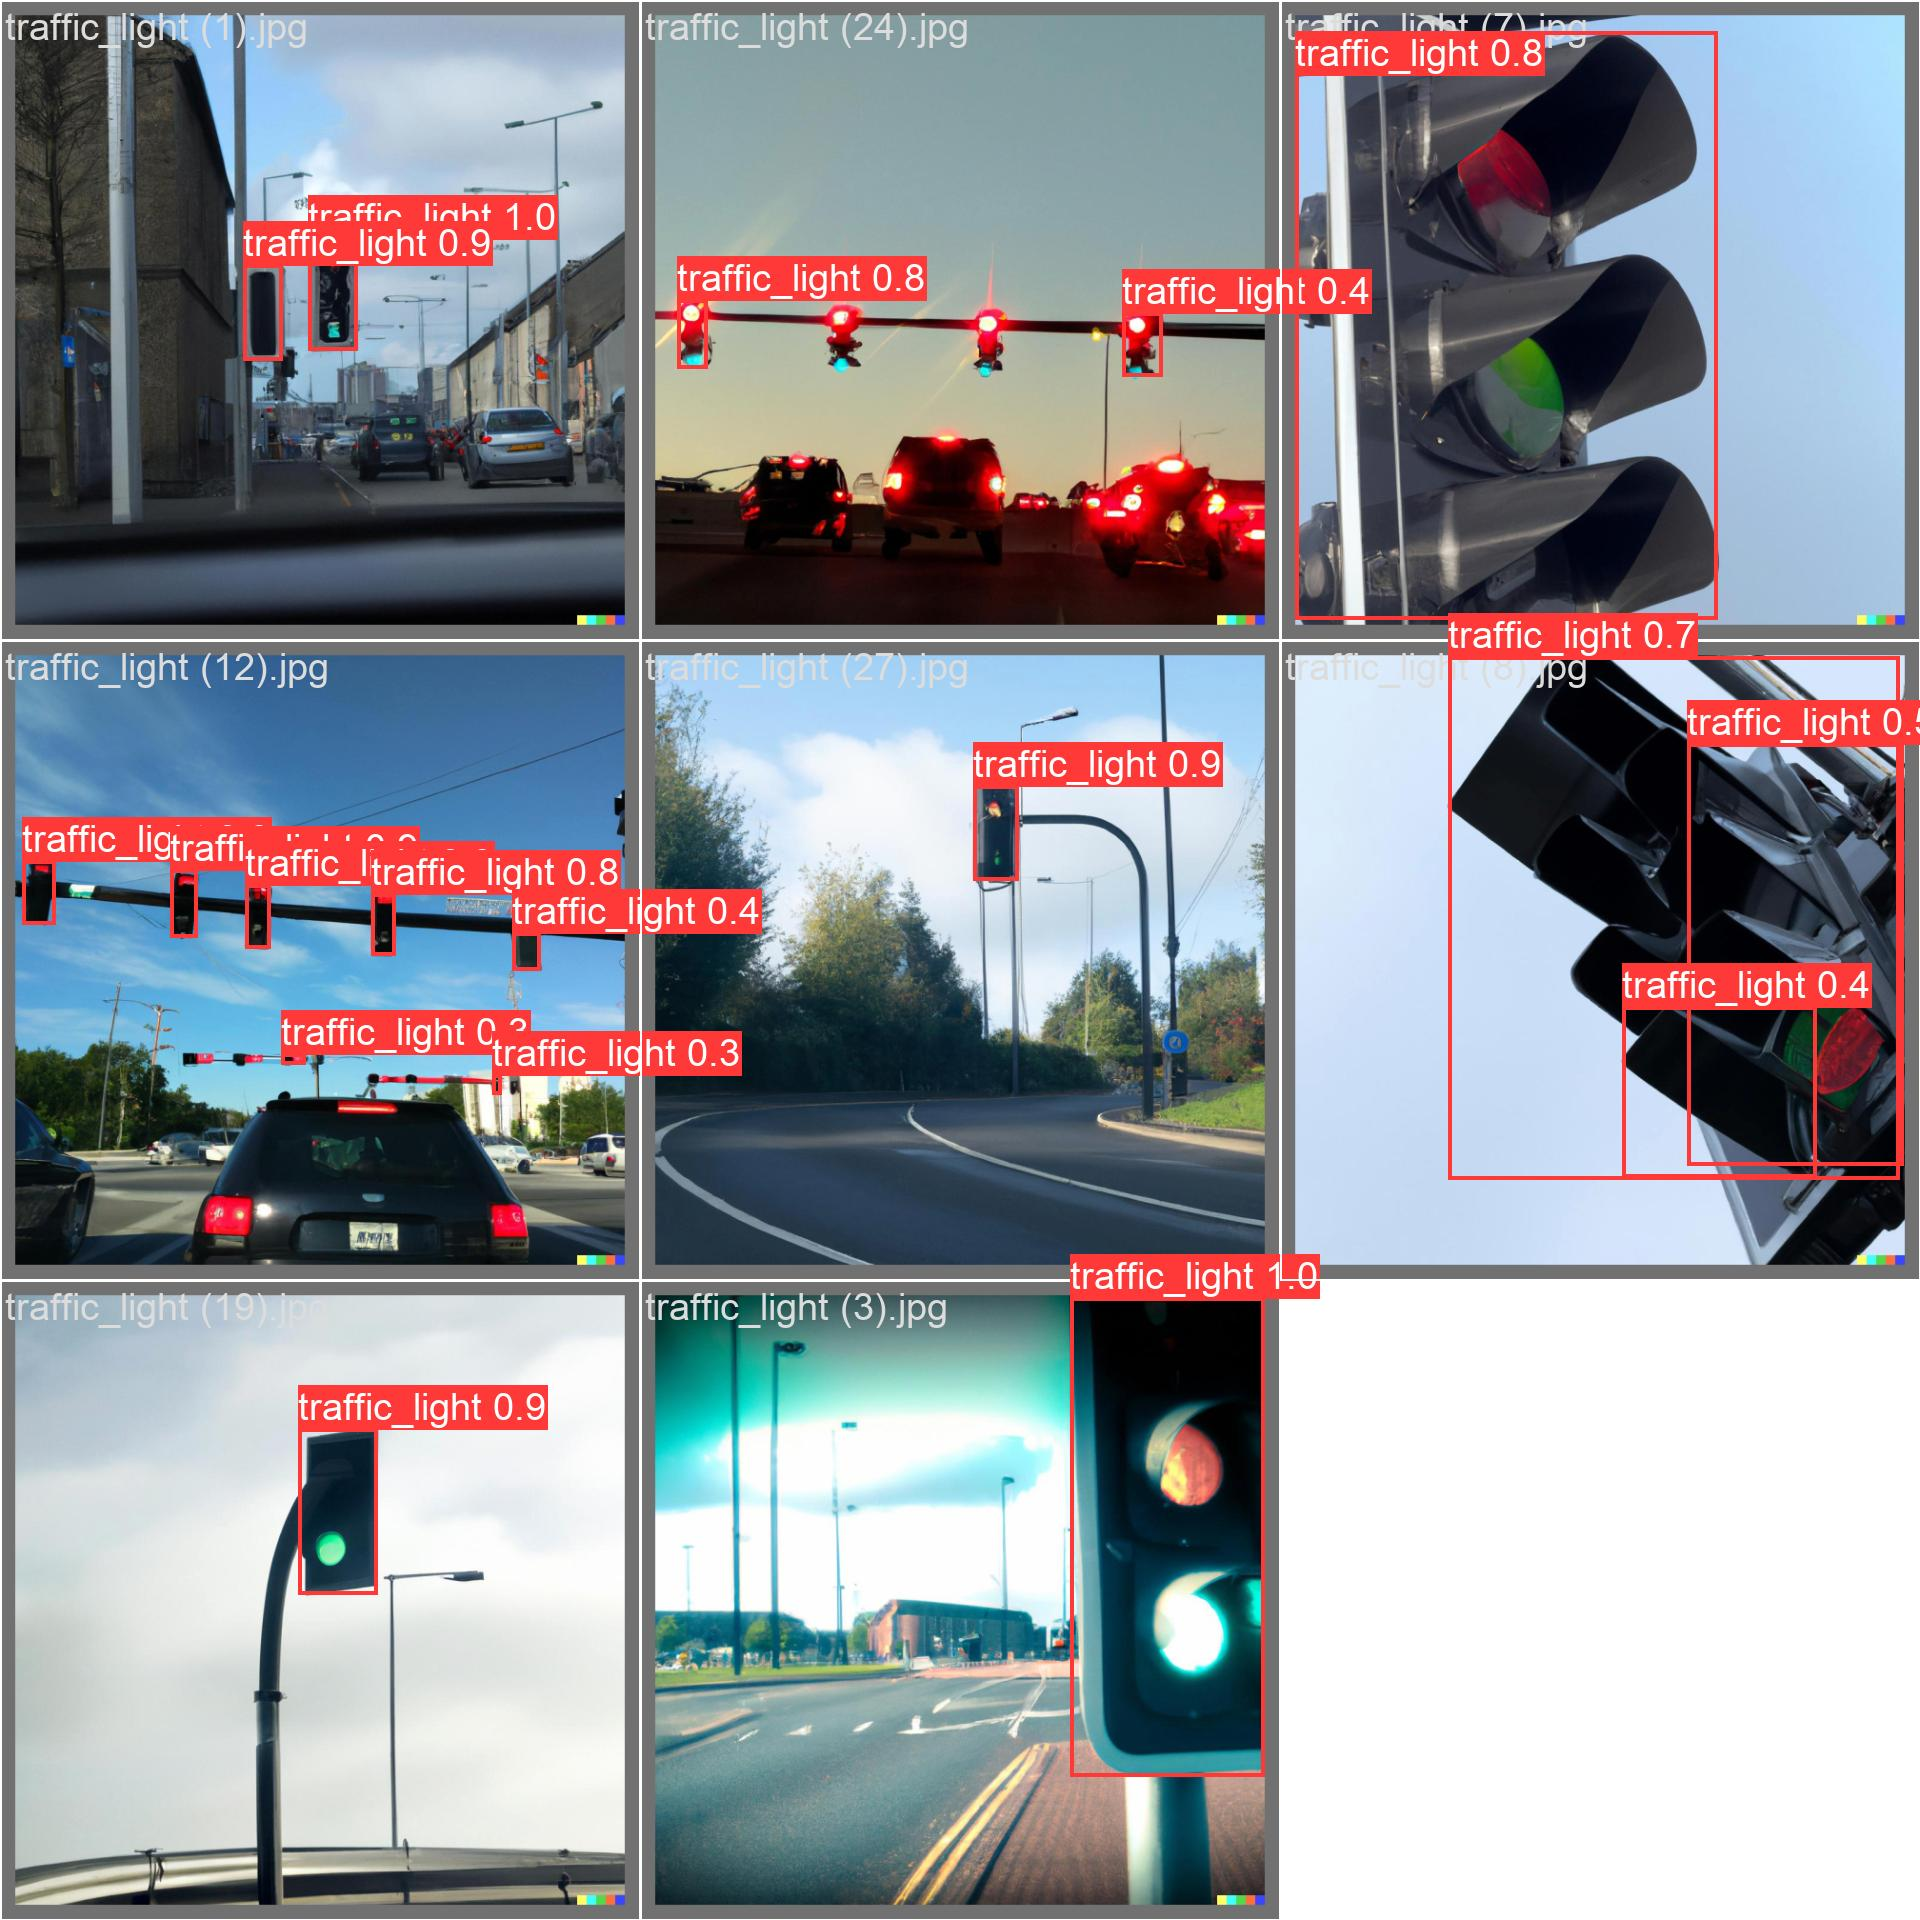

In [23]:
# Val_Batch
Image.open('runs/detect/train2/val_batch0_pred.jpg')